                    Zomato Data Analysis Using Python                       

# Zomato Data Analysis Using Python

Understanding customer preferences and restaurant trends is important for making informed business decisions in food industry. In this article, we will analyze Zomato’s restaurant dataset using Python to find meaningful insights.

# Step 1: Importing necessary Python libraries.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Creating the data frame.

In [15]:
dataset = "https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/Zomato-data-.csv"

df = pd.read_csv(dataset)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Step 3: Data Cleaning and Preparation

In [16]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [18]:
df.duplicated().sum()

0

In [19]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [20]:
# 1. Convert the rate column to a float by removing denominator characters.
def handle_rate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handle_rate)
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Step 4: Exploring Restaurant Types

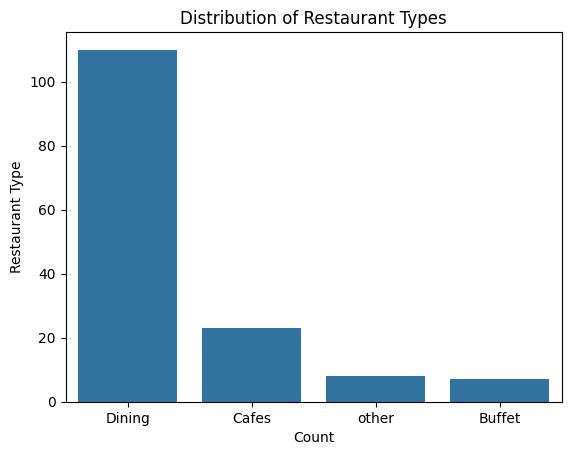

In [26]:
sns.countplot(x='listed_in(type)', data=df, order=df['listed_in(type)'].value_counts().index)
plt.title('Distribution of Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.show()

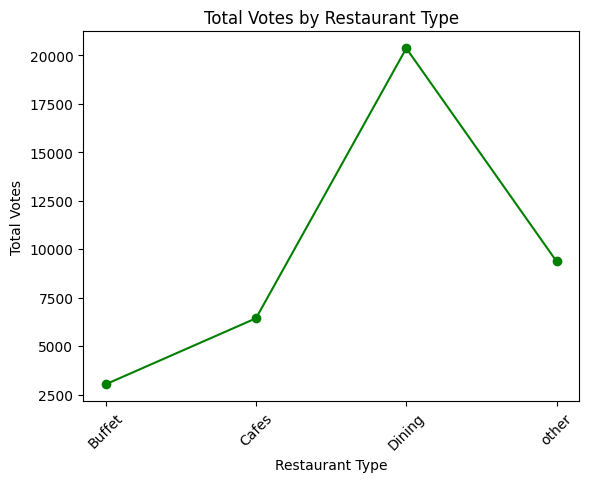

In [29]:
#  Votes by Restaurant Type

grouped_votes = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_votes})
plt.plot(result, c='green', marker='o')
plt.title('Total Votes by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()

# Step 5: Identify the Most Voted Restaurant

In [31]:
max_votes = df['votes'].max()

most_voted_restaurant = df.loc[df['votes'] == max_votes, 'name']
print("Most Voted Restaurant:")
print(most_voted_restaurant)

Most Voted Restaurant:
38    Empire Restaurant
Name: name, dtype: object


# Step 6: Online Order Availability

In [32]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='count'>

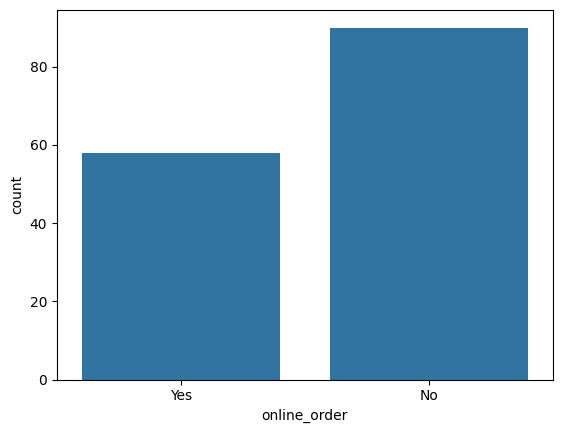

In [34]:
sns.countplot(x=df['online_order'])

# Step 7: Analyze Ratings

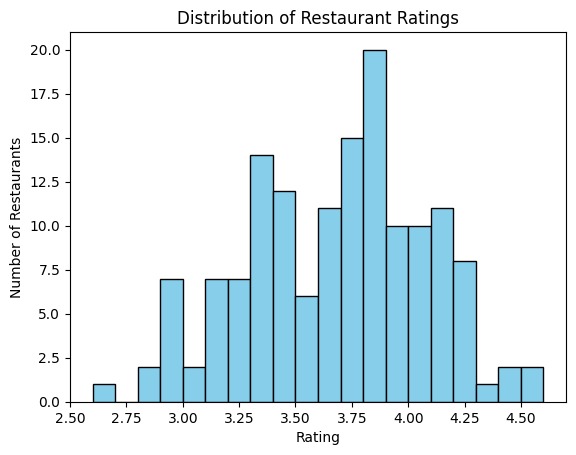

In [35]:
plt.hist(df['rate'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

# Step 8: Approximate Cost for Couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

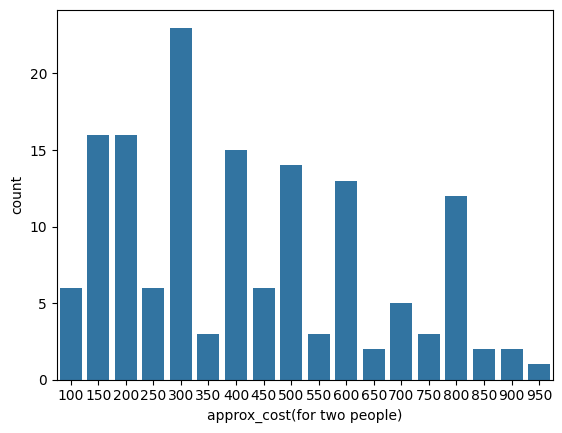

In [36]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Step 9: Ratings Comparison - Online vs Offline Orders

<Axes: xlabel='online_order', ylabel='rate'>

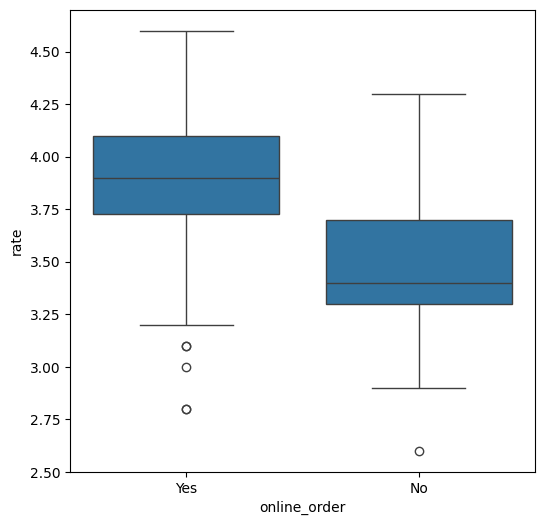

In [38]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

# Step 10: Order Mode Preferences by Restaurant Type

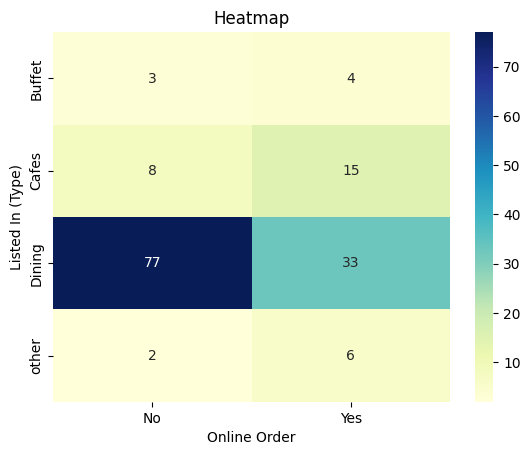

In [39]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()